In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 9.1 matplotlib API入门

## Figure和Subplot 

<IPython.core.display.Javascript object>


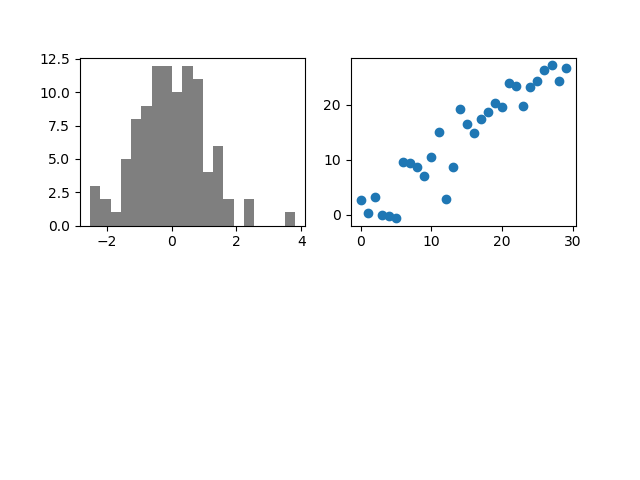

In [6]:
fig = plt.figure()
#图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.5)  #直方图
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30)) #散点图

<IPython.core.display.Javascript object>


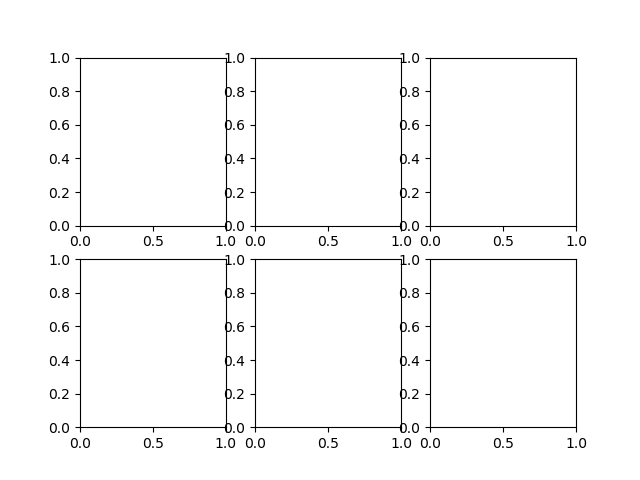

In [9]:
#可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：
fig, axes = plt.subplots(2, 3)
axes[0,1]

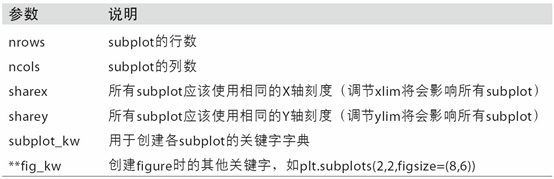

## 调整subplot周围的间距

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。
间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。

In [7]:
#subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
#wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。

<IPython.core.display.Javascript object>


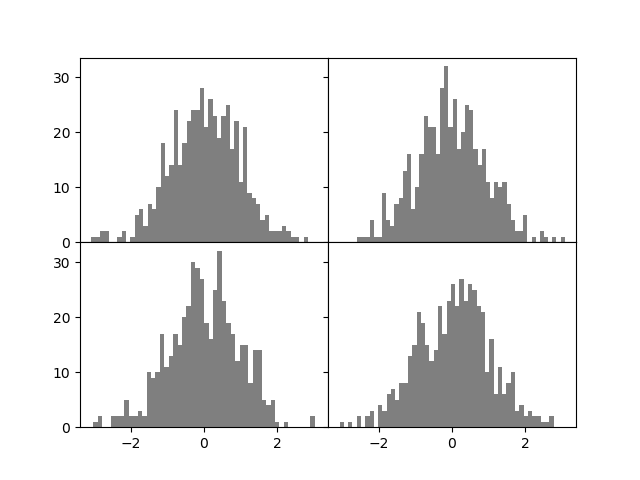

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色、标记和线型

<IPython.core.display.Javascript object>


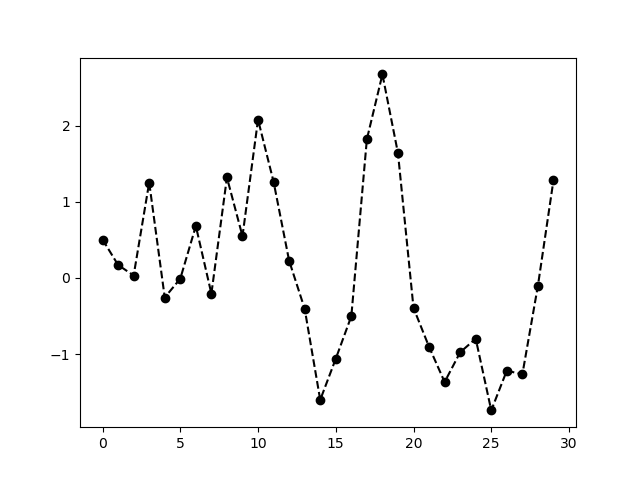

In [14]:
#ax.plot(x, y, 'g--')
#ax.plot(x, y, linestyle='--', color='g')

plt.plot(np.random.randn(30).cumsum(), 'ko--')
#plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


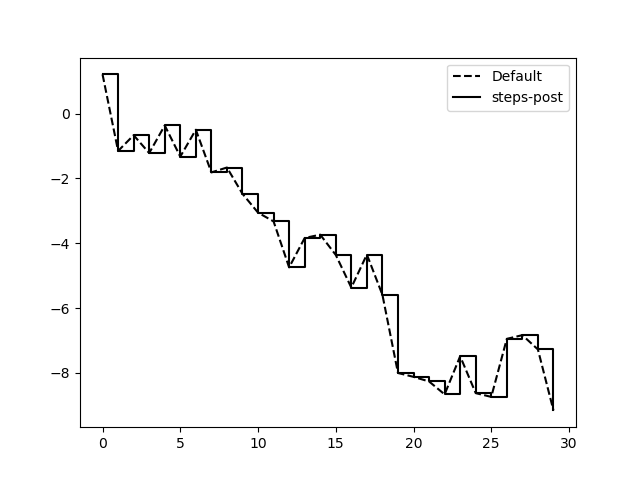

In [15]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 标题、刻度、标签

xlim、xticks和xticklabels之类的方法，它们分别控制图表的范围、刻度位置、刻度标签等。
调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

<IPython.core.display.Javascript object>


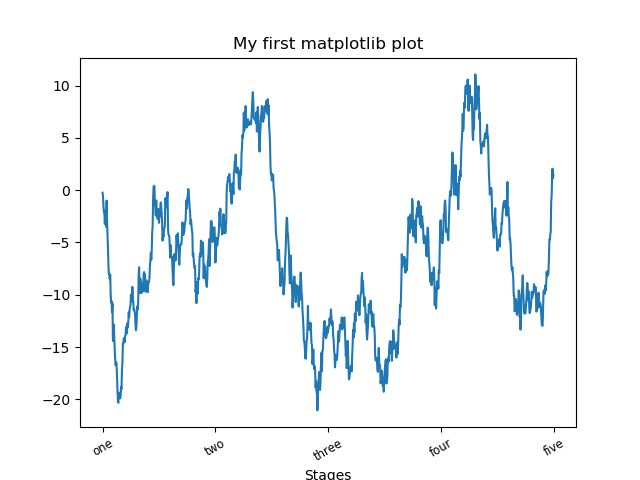

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [30]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #设置刻度位置
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small') #刻度标签
ax.set_title('My first matplotlib plot') #标题
ax.set_xlabel('Stages') #横坐标标签

Text(0.5, 23.52222222222222, 'Stages')

In [31]:
#轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为：
props = {
    'title': 'My first matplotlib plot',
    'xticks':[0, 250, 500, 750, 1000],
    'xticklabels':['one', 'two', 'three', 'four', 'five'],
    'xlabel': 'Stages'
}
ax.set(**props)

[[<matplotlib.axis.XTick at 0x21eba84fd68>,
 [Text(0, 0, 'one'),
  Text(250, 0, 'two'),
  Text(500, 0, 'three'),
  Text(750, 0, 'four'),
  Text(1000, 0, 'five')],
 Text(0.5, 10.763891973024519, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

## 添加图例

<IPython.core.display.Javascript object>


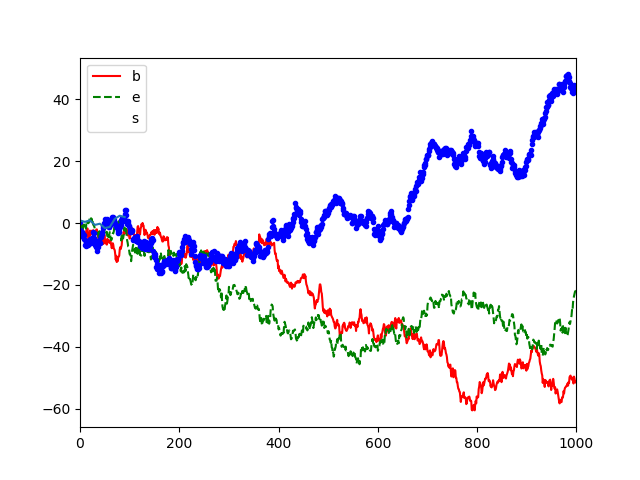

In [47]:
from numpy.random import randn
#最简单的是在添加subplot的时候传入label参数：
fig,ax = plt.subplots(1,1)
ax.plot(randn(1000).cumsum(),'r',label='one')
ax.plot(randn(1000).cumsum(),'g--',label='two')
ax.plot(randn(1000).cumsum(),'b.',label='three')
ax.legend('best')


_,ax = plt.subplots(n,m)  一张figure里创建n行m列子图
1. 若n=m=1，则ax;
2. 若n、m中其中一个是1，则ax[0];
3. 若都不为1，则ax[a,b]。

## 注解以及在Subplot上绘图

In [51]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

2007-10-11 00:00:00 a Peak of bull market
2008-03-12 00:00:00 a Bear Stearns Fails
2008-09-15 00:00:00 a Lehman Bankruptcy


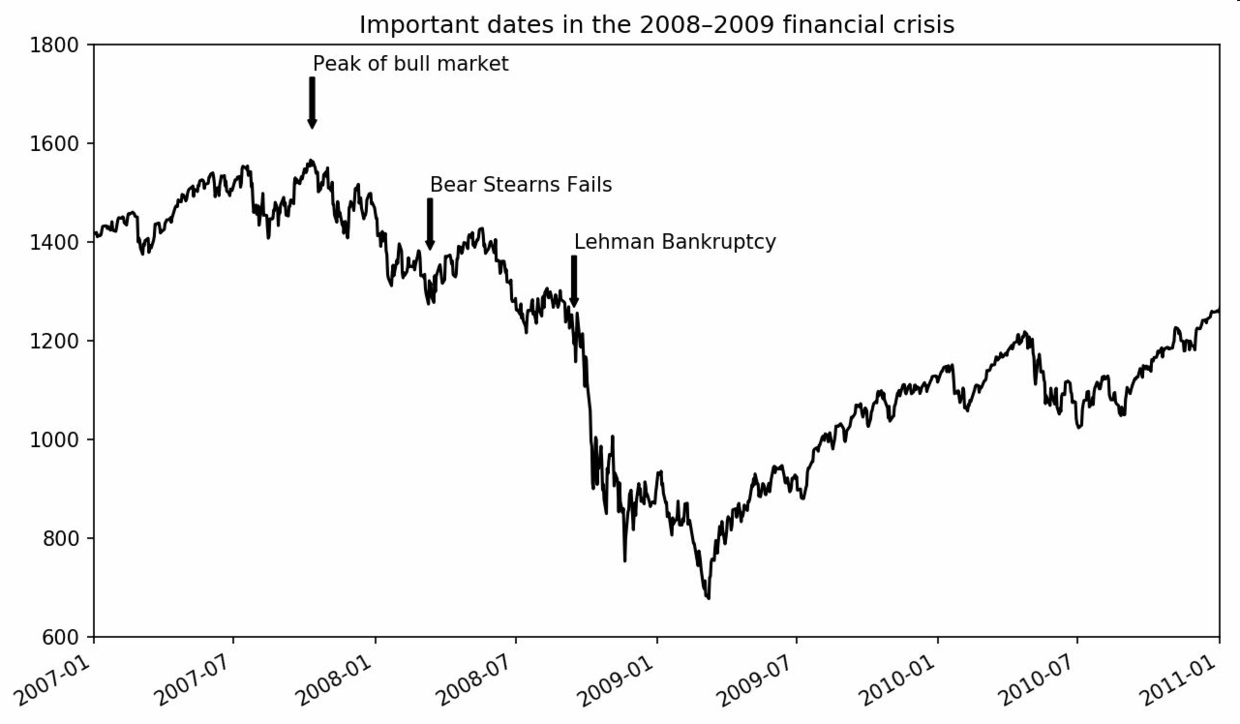
这张图中有几个重要的点要强调：ax.annotate方法可以在指定的x和y坐标轴绘制标签。我们使用set_xlim和set_ylim人工设定起始和结束边界，而不使用matplotlib的默认方法。最后，用ax.set_title添加图标标题。

要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中

<IPython.core.display.Javascript object>


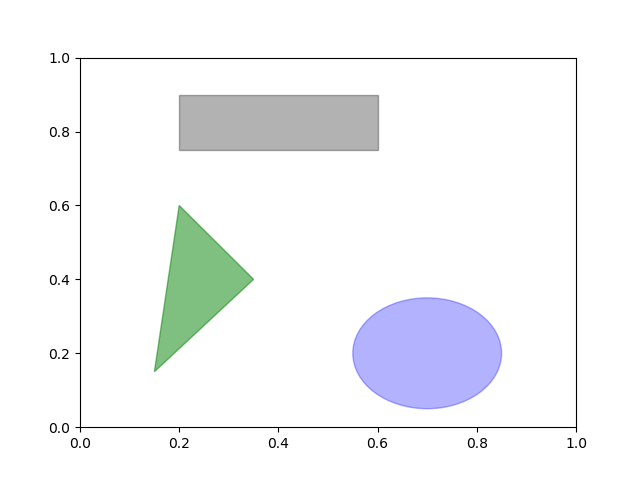

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 将图表保存到文件

In [ ]:
plt.savefig('figpath.svg')
#发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。
#要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

# 9.2 使用pandas和seaborn绘图

## 线型图

<IPython.core.display.Javascript object>


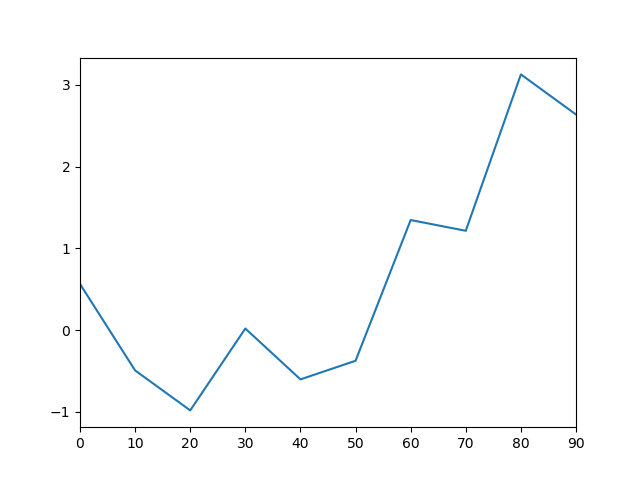

In [56]:
#Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
#该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。

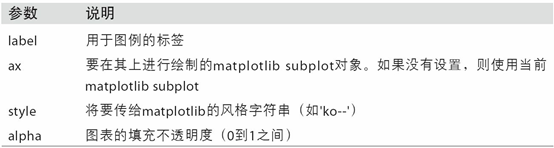

<IPython.core.display.Javascript object>


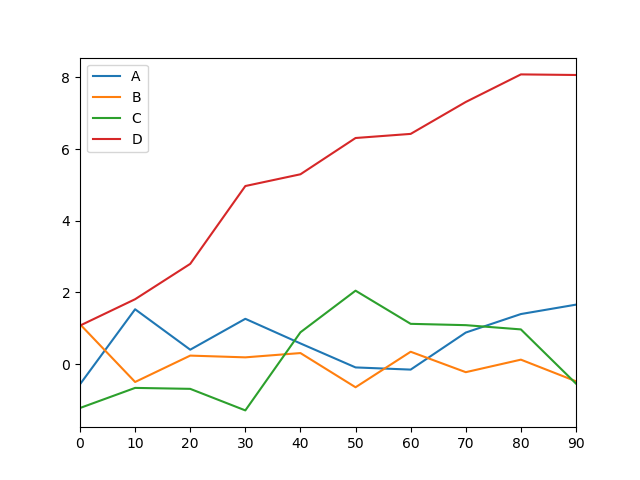

In [57]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

## 柱状图

plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度（如图9-15所示）：

<IPython.core.display.Javascript object>


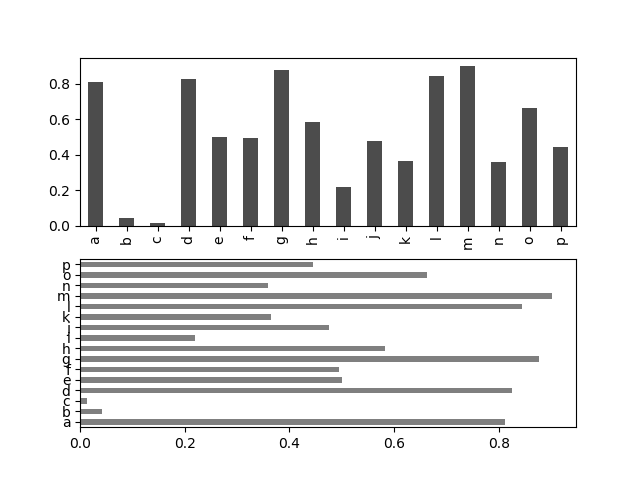

In [69]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.5)

In [86]:
#对于DataFrame，柱状图会将每一行的值分为一组，并排显示，如图9-16所示：
df = pd.DataFrame(np.random.rand(7, 4), index=['one', 'two', 'three', 'four', 'five', 'six','six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.342589,0.187148,0.383359,0.295944
two,0.266123,0.473128,0.283930,0.697862
three,0.933431,0.342905,0.789974,0.846418
four,0.314080,0.955730,0.094180,0.102969
five,0.895130,0.882568,0.993676,0.504907
six,0.308181,0.487039,0.944185,0.311383
six,0.630341,0.863431,0.371810,0.496825


<IPython.core.display.Javascript object>


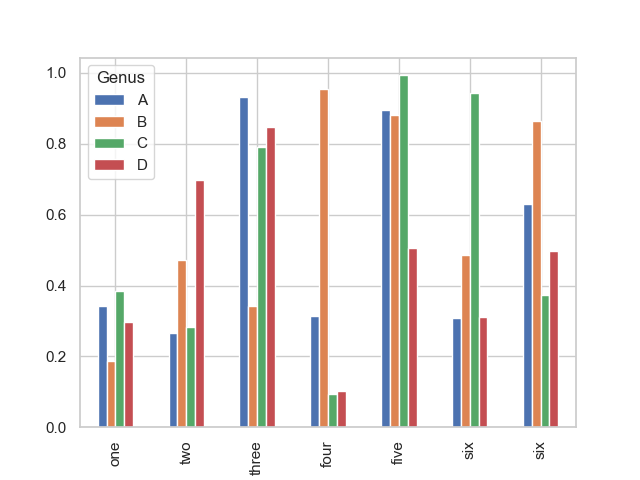

In [89]:
#注意，DataFrame各列的名称"Genus"被用作了图例的标题。
df.plot.bar()

<IPython.core.display.Javascript object>


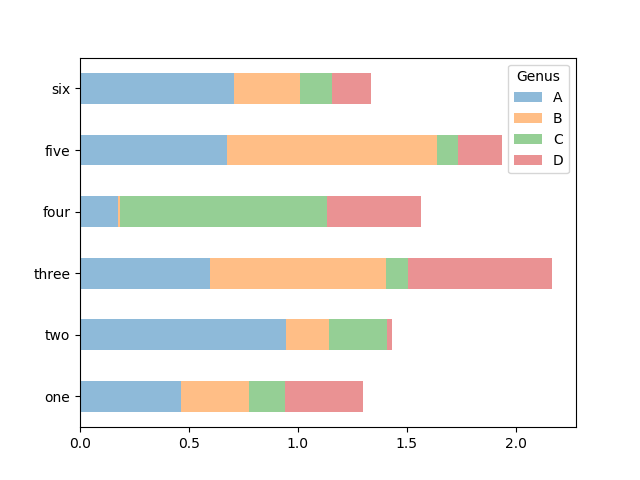

In [61]:
#设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起
df.plot.barh(stacked=True, alpha=0.5)

<IPython.core.display.Javascript object>


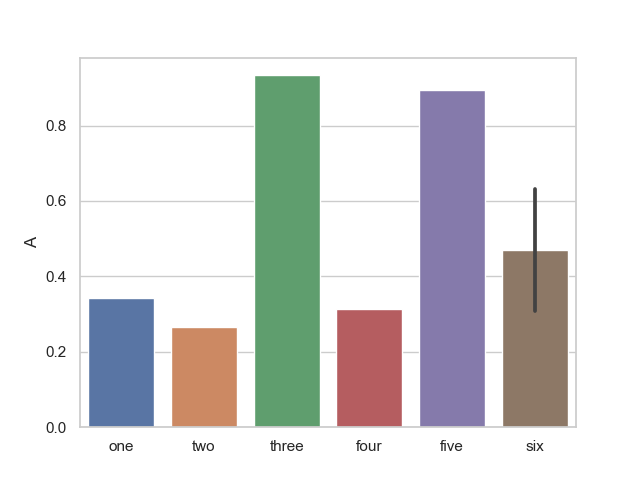

In [90]:
import seaborn as sns
sns.barplot(x=df.index,y='A',data=df)
sns.set(style='whitegrid')
'''
seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。
Seaborn会对”six“列中的数值进行归类后按照estimator参数的方法（默认为平均值）计算相应的值，
计算出来的值就作为条形图所显示的值（条形图上的误差棒则表示各类的数值相对于条形图所显示的值的误差）
'''

## 直方图和密度图

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

<IPython.core.display.Javascript object>


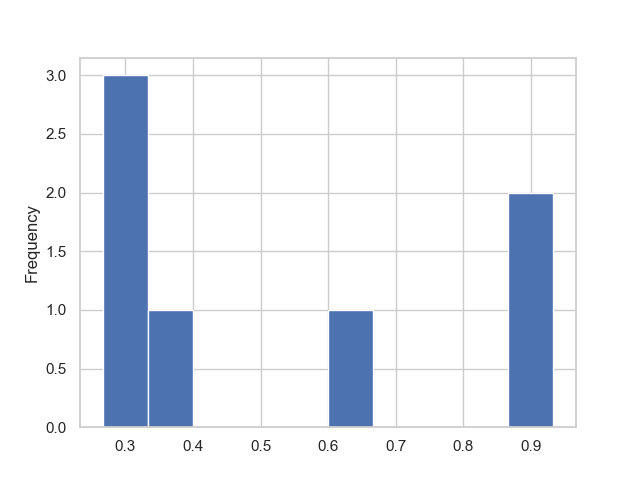

In [93]:
df['A'].plot.hist(bins=10)

<IPython.core.display.Javascript object>


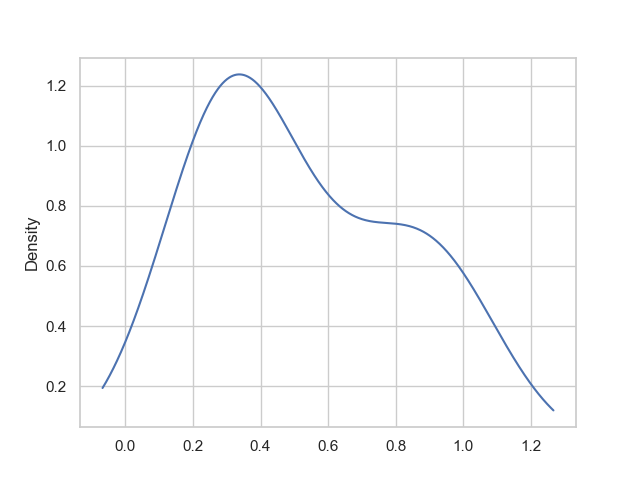

In [94]:
#与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。
#一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。
df['A'].plot.density()

seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。

<IPython.core.display.Javascript object>


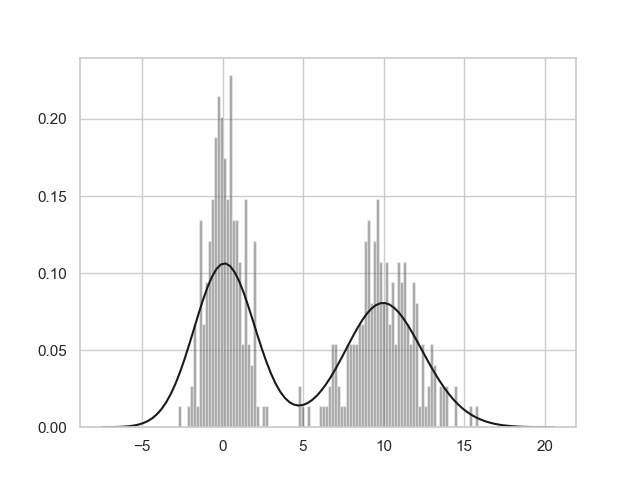

In [101]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## 散布图或点图

<IPython.core.display.Javascript object>


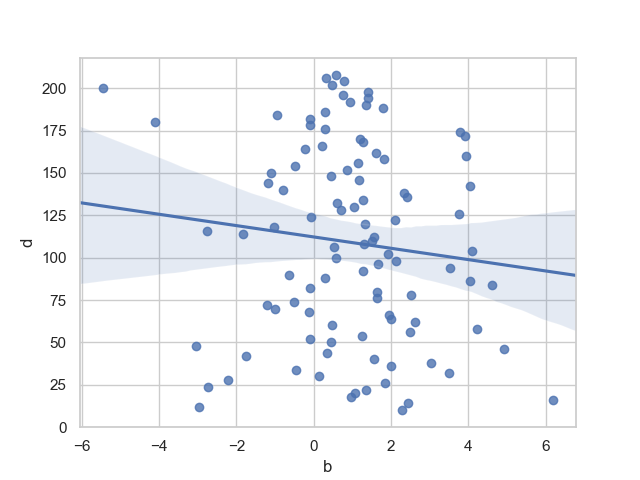

In [112]:
np.random.seed(123)
df = pd.DataFrame({'a':np.random.randn(100),'b':np.random.randn(100)*2+1,'c':np.arange(0,100),'d':np.arange(0,100)*2+10})
sns.regplot('b','d',data=df)

<IPython.core.display.Javascript object>


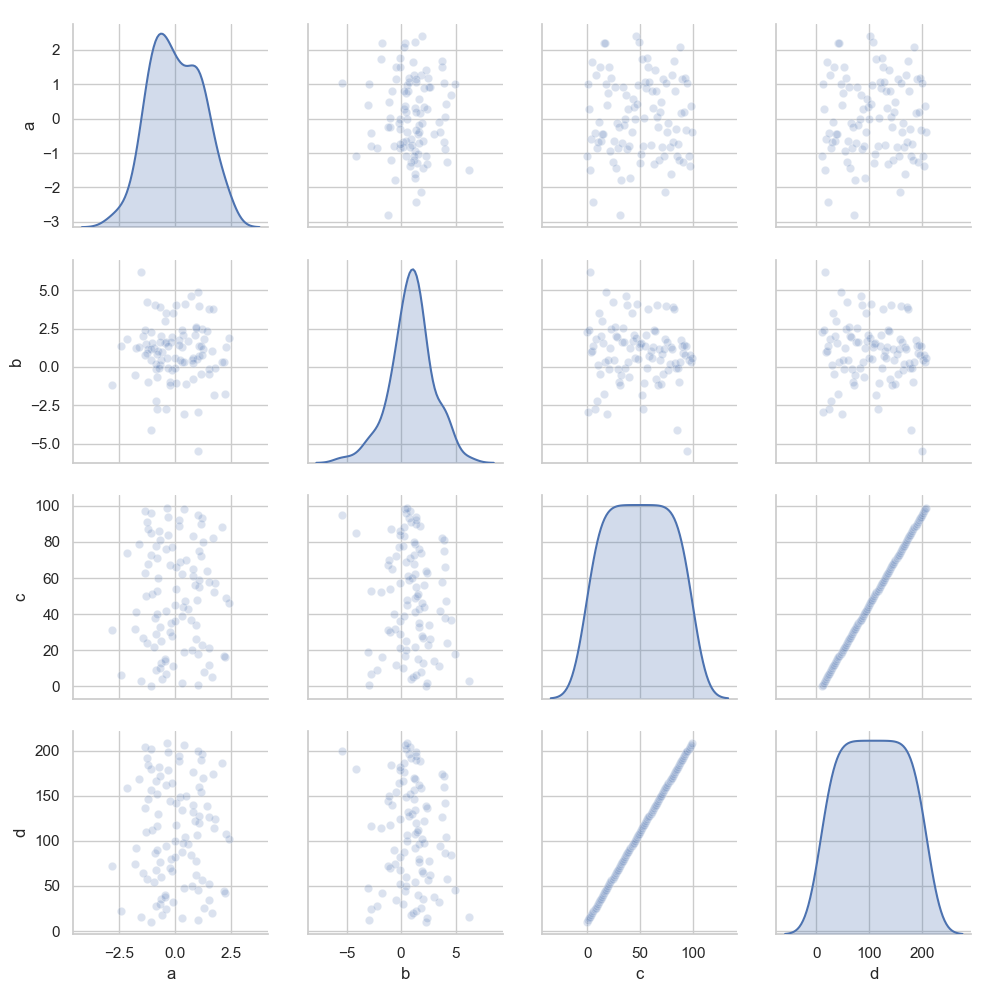

In [113]:
#在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。
sns.pairplot(df,diag_kind='kde',plot_kws={'alpha':0.2})

## 分面网格（facet grid）和类型数据

要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图（见图9-26）：

In [130]:
df = pd.DataFrame({'a':['A']*4+['B']*4,'b':np.random.randn(8)*2+1,'c':np.arange(0,8),'d':np.arange(0,8)*2+10,
                   'e':['a','a','b','b']*2,'f':['c','d']*4})
df

,a,b,c,d,e,f
0,A,2.457071,0,10,a,c
1,A,0.802480,1,12,a,d
2,A,-0.059978,2,14,b,c
3,A,-3.886152,3,16,b,d
4,B,-1.760703,4,18,a,c
5,B,4.396118,5,20,a,d
6,B,-0.377097,6,22,b,c
7,B,-1.169538,7,24,b,d


<IPython.core.display.Javascript object>


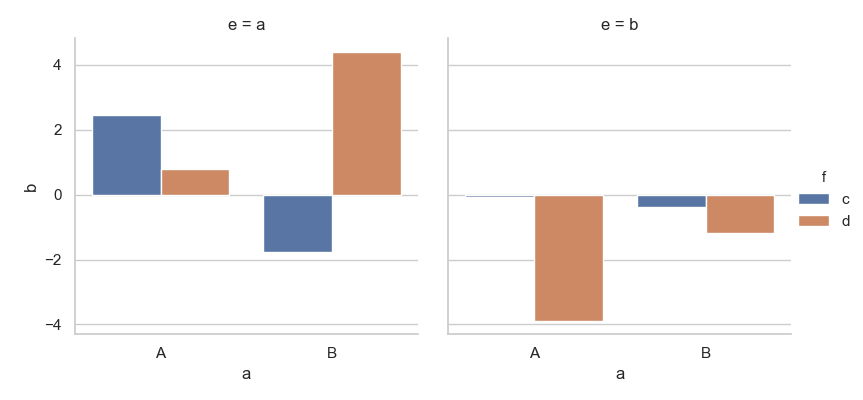

In [141]:
sns.factorplot(x='a',y='b',col='e',hue='f',kind='bar',data=df,size=2*2)

<IPython.core.display.Javascript object>


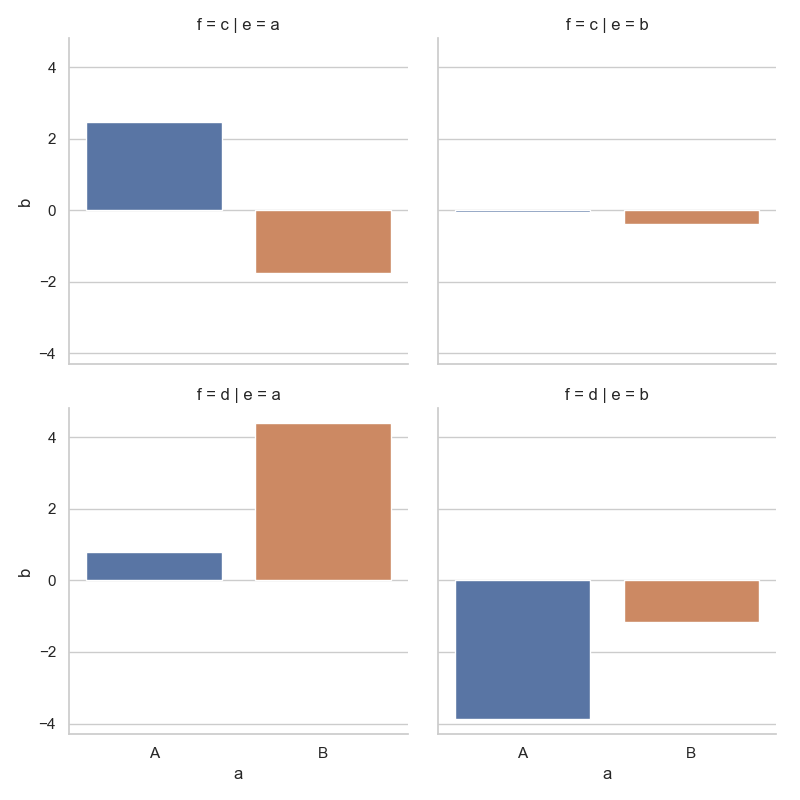

In [143]:
#除了在分面中用不同的颜色按时间分组，我们还可以通过给每个时间值添加一行来扩展分面网格：
sns.factorplot(x='a',y='b',col='e',row='f',kind='bar',data=df,size=2*2)

d:\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


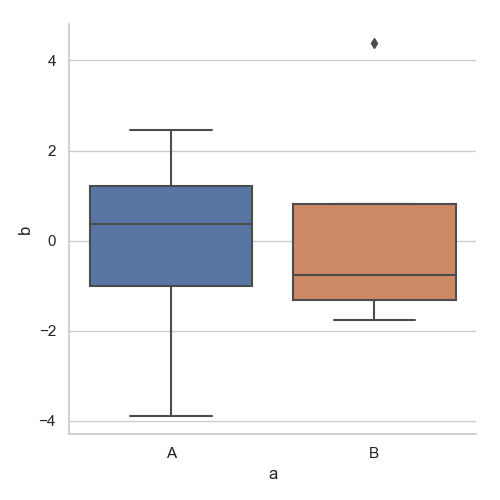

In [146]:
#盒图
sns.factorplot(x='a',y='b',kind='box',data=df)